# Sampler lab exercise solution with W state

This program samples one piece of candy from a box that contains three chocolate candies. The circuit that chooses the piece of candy should be a three qubit [W state](https://en.wikipedia.org/wiki/W_state).

### 1. Initialize the account

In [5]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(channel="ibm_quantum")
backend = service.backend("ibmq_qasm_simulator")

### 2. Create a circuit

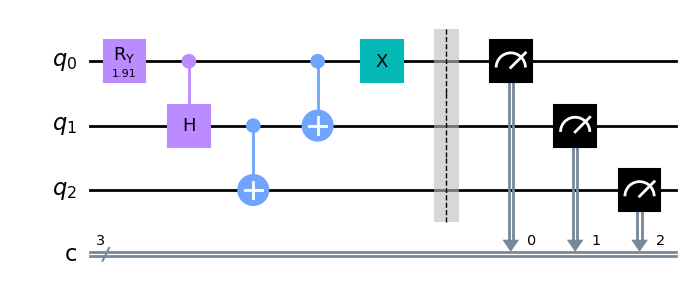

In [11]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.ry(1.91063324, qreg_q[0])
circuit.ch(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.x(qreg_q[0])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[2], creg_c[2])

display(circuit.draw("mpl"))

### 3. Initialize the Qiskit Runtime Sampler

In [12]:
from qiskit_ibm_runtime import Sampler

sampler = Sampler(backend=backend)

### 4. Invoke the Sampler and get results

In [13]:
job = sampler.run(circuit)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

>>> Job ID: cjs5i78vndeds0nkr0d0
>>> Job Status: JobStatus.RUNNING


In [14]:
result = job.result()
print(f">>> {result}")
print(f"  > Quasi-probability distribution: {result.quasi_dists[0]}")
print(f"  > Metadata: {result.metadata[0]}")

>>> SamplerResult(quasi_dists=[{4: 0.3275, 2: 0.339, 1: 0.3335}], metadata=[{'shots': 4000}])
  > Quasi-probability distribution: {4: 0.3275, 2: 0.339, 1: 0.3335}
  > Metadata: {'shots': 4000}


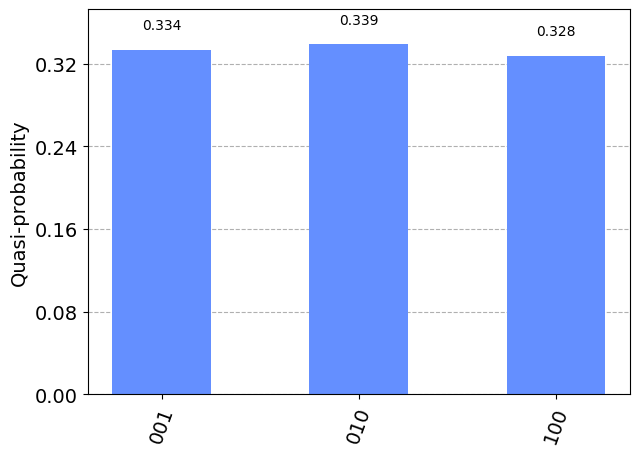

In [15]:
from qiskit.visualization import plot_histogram
plot_histogram(job.result().quasi_dists[0].binary_probabilities())